# 1. Data Exploration

## Are there any data quality issues present?

### Yes, there are duplicated entries and missing data for each table.

#### USER_ID and PRODUCT_ID are missing in the User and Product tables: Approximately 50K transaction records do not have corresponding users in the User table; approximately 25K transaction records do not have corresponding products in the Product table.
#### Duplicate RECEIPT_IDs and transaction records were found in the Transaction table.

In [51]:
import pandas as pd
import numpy as np
from IPython.display import display
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [52]:
# Create SQLite connection
connect= sql.connect("data.db")

# Load csv to a Dataframe
df_pd=pd.read_csv("PRODUCTS_TAKEHOME.csv")
df_tr=pd.read_csv("TRANSACTION_TAKEHOME.csv")
df_ur=pd.read_csv("USER_TAKEHOME.csv")



## 1.1 Understanding the Data Structure

In [53]:
dataset={"Products":df_pd,"Transactions":df_tr,"Users":df_ur}

In [75]:
for name,df in dataset.items():
    print(f"\n{name} Head:")
    display(df.head(5))


Products Head:


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,796494407820.00
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,23278011028.00
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225.00
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,35000466815.00
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459.00



Transactions Head:


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,15300014978.00,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,78742229751.00,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536.00,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,47900501183.00,1.00,



Users Head:


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [55]:
pd.options.display.float_format = '{:.2f}'.format  # Adjust decimal places as needed


In [57]:
for name,df in dataset.items():
    print(f"\n{name} info:")
    display(df.info())


Products info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


None


Transactions info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


None


Users info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


None

## Check Duplicates

In [58]:
for name,df in dataset.items():
    print(f"\n{name} duplicates:")
    display(df.duplicated().sum())


Products duplicates:


215


Transactions duplicates:


171


Users duplicates:


0

## Drop Duplicates

In [59]:
for name,df in dataset.items():
    df=df.drop_duplicates()
    print(f"\n{name} droped duplicates:")
    display(df.duplicated().sum())


Products droped duplicates:


0


Transactions droped duplicates:


0


Users droped duplicates:


0

## Check Missing Data

In [60]:
for name,df in dataset.items():
    print(f"\n{name} Missing data:")
    display(df.isnull().sum())


Products Missing data:


CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


Transactions Missing data:


RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64


Users Missing data:


ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [61]:
# Save DataFrame as a table in SQLite

for name,df in dataset.items():
    df.to_sql(name,connect,if_exists="replace",index=False)

query= "Select count(*) from Transactions t left join Users u on u.id=t.user_id where u.id is null"
result=pd.read_sql(query,connect)
display(result)

,count(*)
0,49738


In [62]:
query= "Select count(*) from Transactions t left join Product p on p.barcode=t.barcode where p.barcode is null"
result=pd.read_sql(query,connect)
display(result)

,count(*)
0,25170


---

# 2. provide SQL queries


## Closed-ended question 1: What are the top 5 brands by receipts scanned among users 21 and over?


In [63]:
query = """
WITH cte AS (
    SELECT COUNT(t.RECEIPT_ID) AS transaction_count,
           p.brand AS brand,
           CAST((JULIANDAY(SUBSTR(t.SCAN_DATE, 1, 19)) - JULIANDAY(SUBSTR(u.birth_date, 1, 19))) / 365 AS INTEGER) AS year_diff
    FROM Transactions t
    LEFT JOIN Users u ON u.id = t.user_id
    LEFT JOIN Products p ON p.barcode = t.barcode
    GROUP BY brand, year_diff
    HAVING year_diff > 21 AND brand IS NOT NULL
)

SELECT brand, SUM(transaction_count) AS total_transactions
FROM cte
GROUP BY brand
ORDER BY total_transactions DESC
LIMIT 5;

"""
result=pd.read_sql(query,connect)
display(result)

,brand,total_transactions
0,NERDS CANDY,6
1,DOVE,6
2,TRIDENT,4
3,SOUR PATCH KIDS,4
4,MEIJER,4


## Closed-ended question 2: What are the top 5 brands by sales among users that have had their account for at least six months?

In [64]:


query = """
WITH cte AS (
    SELECT COUNT(t.RECEIPT_ID) AS transaction_count,
           p.brand AS brand,
           CAST((JULIANDAY(SUBSTR(t.SCAN_DATE, 1, 19)) - JULIANDAY(SUBSTR(u.CREATED_DATE, 1, 19))) / 12 AS INTEGER) AS months
    FROM Transactions t
    LEFT JOIN Users u ON u.id = t.user_id
    LEFT JOIN Products p ON p.barcode = t.barcode
    GROUP BY brand, months
    HAVING months >= 6 AND brand IS NOT NULL
)

SELECT brand, SUM(transaction_count) AS total_transactions
FROM cte
GROUP BY brand
ORDER BY total_transactions DESC
LIMIT 5;
"""
result=pd.read_sql(query,connect)
display(result)

,brand,total_transactions
0,NERDS CANDY,6
1,DOVE,6
2,TRIDENT,4
3,SOUR PATCH KIDS,4
4,MEIJER,4


## Open ended questions 2: Which is the leading brand in the Dips & Salsa category?

### Assumption:  
### There are 847 Dip & Salsa brands that had transactions. The brand sizes show significant variation in terms of product size, transaction amount and sales. With exploration, I define the leading brand as those with top 10 final sales

In [65]:
import pandas as pd

df_tr_before_clean = df_tr.copy()

# Ensure FINAL_SALE and FINAL_QUANTITY are numeric 
df_tr['FINAL_SALE'] = pd.to_numeric(df_tr['FINAL_SALE'], errors='coerce')
df_tr['FINAL_QUANTITY'] = pd.to_numeric(df_tr['FINAL_QUANTITY'], errors='coerce')

# # Assume that all "Zero" having  final_quantity equals to one
# df_tr['FINAL_QUANTITY'] = df_tr['FINAL_QUANTITY'].apply(
#     lambda x: float(x) if pd.to_numeric(x, errors='coerce') is not None
#     and pd.notna(pd.to_numeric(x, errors='coerce')) else 1.00)

### Data Cleaning - Select the maximum quantity and sale from the transaction table group by receipt id

In [66]:
# Example of duplicate receipt
dataset={"Products":df_pd,"Transactions":df_tr_before_clean,"Users":df_ur}

for name,df in dataset.items():
    df.to_sql(name,connect,if_exists="replace",index=False)

query= "Select * from transactions where BARCODE==72945612815.00 and PURCHASE_DATE='2024-06-24'"
result=pd.read_sql(query,connect)
display(result.head(10))

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,37d16504-2963-458f-8f7a-bd9a0f9ea2e0,2024-06-24,2024-06-24 23:12:30.285 Z,SMITH'S,5dd3644ee08e9248200b5124,72945612815.00,zero,3.49
1,37d16504-2963-458f-8f7a-bd9a0f9ea2e0,2024-06-24,2024-06-24 23:12:30.285 Z,SMITH'S,5dd3644ee08e9248200b5124,72945612815.00,1.00,3.49


In [67]:
df_tr_grouped = df_tr.groupby(['RECEIPT_ID', 'PURCHASE_DATE','SCAN_DATE','STORE_NAME','USER_ID','BARCODE'], as_index=False).agg({
    'FINAL_QUANTITY': 'max',   # Max of final sale
    'FINAL_SALE': 'max',     # Maximum quantity
})

display(df_tr_grouped)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,15300014978.00,1.00,1.54
1,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,78742229751.00,1.00,2.54
2,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536.00,1.00,3.49
3,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,47900501183.00,1.00,5.29
4,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,681131411295.00,1.00,1.46
...,...,...,...,...,...,...,...,...
21974,fff60bb7-bf93-4e6b-8055-4d7688da7ead,2024-08-29,2024-08-29 23:47:50.471 Z,WALMART,5eb887f71699c213b1abe2e1,78742213224.00,1.00,1.23
21975,fff6c6c8-e002-4262-85ea-25849d9721db,2024-08-30,2024-09-06 18:39:03.161 Z,WALMART,6220b111e9e82c0c6bc24534,78742369822.00,1.00,1.97
21976,fffbb112-3cc5-47c2-b014-08db2f87e0c7,2024-07-30,2024-08-04 11:43:31.474 Z,WALMART,5eb59d6be7012d13941af5e2,818000020115.00,1.00,4.88
21977,fffbfb2a-7c1f-41c9-a5da-628fa7fcc746,2024-07-28,2024-07-28 11:47:34.180 Z,WALMART,62a0c8f7d966665570351bb8,13000009546.00,1.00,3.48


### Group by Dips and Salsa Brands

In [68]:
# There are 21 transaction records in Dips & Salsa category that have no brand. We will ignore this small amount
df_pd_tr[
    df_pd_tr['BRAND'].isnull() & 
    df_pd_tr['RECEIPT_ID'].notnull() & 
    (
        (df_pd_tr['CATEGORY_1'] == 'Dips & Salsa') | 
        (df_pd_tr['CATEGORY_2'] == 'Dips & Salsa') | 
        (df_pd_tr['CATEGORY_3'] == 'Dips & Salsa') | 
        (df_pd_tr['CATEGORY_4'] == 'Dips & Salsa')
    )
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 10733 to 815568
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CATEGORY_1      21 non-null     object 
 1   CATEGORY_2      21 non-null     object 
 2   CATEGORY_3      21 non-null     object 
 3   CATEGORY_4      0 non-null      object 
 4   MANUFACTURER    0 non-null      object 
 5   BRAND           0 non-null      object 
 6   BARCODE         21 non-null     float64
 7   RECEIPT_ID      21 non-null     object 
 8   PURCHASE_DATE   21 non-null     object 
 9   SCAN_DATE       21 non-null     object 
 10  STORE_NAME      21 non-null     object 
 11  USER_ID         21 non-null     object 
 12  FINAL_QUANTITY  21 non-null     float64
 13  FINAL_SALE      21 non-null     float64
dtypes: float64(3), object(11)
memory usage: 2.5+ KB


In [69]:
df_pd_tr_ds = df_pd_tr[
        (df_pd_tr['CATEGORY_1'] == 'Dips & Salsa') | 
        (df_pd_tr['CATEGORY_2'] == 'Dips & Salsa') | 
        (df_pd_tr['CATEGORY_3'] == 'Dips & Salsa') | 
        (df_pd_tr['CATEGORY_4'] == 'Dips & Salsa')
]

df_pd_tr_ds = df_pd_tr_ds.groupby(['BRAND'], as_index=False).agg({
    'BARCODE': 'nunique', # Product count
    'STORE_NAME': 'nunique',  # Store count
    'RECEIPT_ID': 'nunique',  # Transaction count
    'USER_ID': 'nunique',  # User count
    'FINAL_QUANTITY': 'sum',   # Sum of final sale
    'FINAL_SALE': 'sum',     # Sum quantity
}).sort_values(by='FINAL_SALE', ascending=False)


In [70]:
df_pd_tr_ds.head(10)

,BRAND,BARCODE,STORE_NAME,RECEIPT_ID,USER_ID,FINAL_QUANTITY,FINAL_SALE
772,TOSTITOS,144,16,36,35,38.00,181.30
295,GOOD FOODS,112,4,9,9,9.00,94.91
557,PACE,117,8,24,24,24.00,85.75
266,FRITOS,26,9,19,19,20.00,67.16
481,MARKETSIDE,58,1,16,16,16.00,65.22
342,HELUVA GOOD!,23,3,15,15,15.00,53.98
483,MARZETTI,107,7,11,11,11.00,51.14
263,FRESHNESS GUARANTEED,17,1,12,12,12.00,46.66
169,DEAN'S DAIRY DIP,1,4,17,17,17.00,39.95
349,HIDDEN VALLEY RANCH,40,3,9,9,10.00,38.06


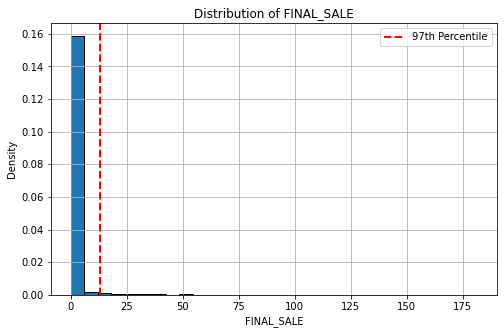

In [71]:
# Plot distribution Final Sale percentile 97 is 12.94
plt.figure(figsize=(8, 5))
plt.hist(df_pd_tr_ds['FINAL_SALE'], bins=30, edgecolor='black', density=True)
plt.axvline(np.percentile(df_pd_tr_ds['FINAL_SALE'], 97), color='r', linestyle='dashed', linewidth=2, label='97th Percentile')
plt.xlabel('FINAL_SALE')
plt.ylabel('Density')
plt.title('Distribution of FINAL_SALE')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

            FINAL_SALE  STORE_NAME  USER_ID  BARCODE
FINAL_SALE        1.00        0.90     0.95     0.31
STORE_NAME        0.90        1.00     0.90     0.33
USER_ID           0.95        0.90     1.00     0.33
BARCODE           0.31        0.33     0.33     1.00


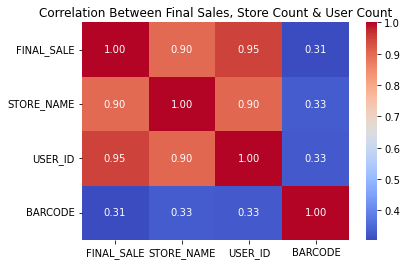

In [74]:
df_corr = df_pd_tr_ds[['FINAL_SALE', 'STORE_NAME', 'USER_ID','BARCODE']].corr()

# Print correlation matrix
print(df_corr)

# Optional: Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Final Sales, Store Count & User Count")
plt.show()